<a href="https://colab.research.google.com/github/Cynthia3992/DeepLearning_Columbia/blob/master/assignment2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The code in this notebook should work identically between TF v1 and v2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

from tensorflow.keras import applications
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Accuracy and Validation Plot function

def plt_acc(history, pfx = ''):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(1, EPOCHS+1)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title(pfx + ' Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title(pfx + ' Training and Validation Loss')
  plt.show()

## Part 1

1) Download the mini-flowers dataset. This contains 1,500 images of five different types of flowers. Modify one of the above notebooks to classify these images using transfer learning. How accurate of a model can you train? 

2) Next, run experiments using at least two pretrained convolutional bases (​applications​), and compare your results. Include a short, informal write-up (using bullet points is fine). What differences do you see, and why? Read the associated papers to learn more about the networks you’re using, linked from the API doc.


In [16]:
## load data fom google dive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = '/content/drive/My Drive/mini_flowers'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')

val_daisy_dir = os.path.join(val_dir, 'daisy')
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_roses_dir = os.path.join(val_dir, 'roses')
val_sunflowers_dir = os.path.join(val_dir, 'sunflowers')
val_tulips_dir = os.path.join(val_dir, 'tulips')

In [19]:
print(len(os.listdir(val_daisy_dir)))
print(len(os.listdir(val_dandelion_dir))) 
print(len(os.listdir(val_roses_dir))) 
print(len(os.listdir(val_sunflowers_dir)))
print(len(os.listdir(val_tulips_dir)))

100
100
100
100
100


In [0]:
# Images will be resized to(TARGET_SHAPE, TARGET_SHAPE) as they're read off disk.
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [21]:
CLASS_MODE = 'categorical'
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode=CLASS_MODE)

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=val_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode=CLASS_MODE)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [0]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

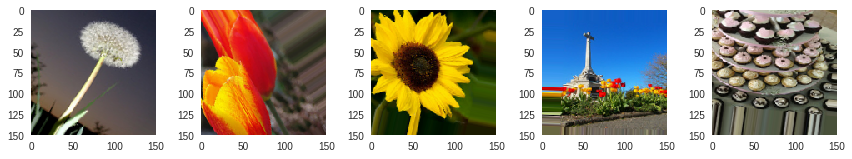

In [24]:
plotImages(sample_training_images[:5])

## Build and Train the model

In [0]:
EPOCHS = 50

In [28]:
conv_base = applications.VGG16(weights='imagenet',include_top=False, 
                               input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss= 'categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

Epoch 1/50
32/32 [==============================] - 13s 416ms/step - loss: 2.0030 - acc: 0.4360 - val_loss: 0.9102 - val_acc: 0.6400
Epoch 2/50
32/32 [==============================] - 12s 372ms/step - loss: 0.7970 - acc: 0.6880 - val_loss: 0.7369 - val_acc: 0.7320
Epoch 3/50
32/32 [==============================] - 12s 368ms/step - loss: 0.7023 - acc: 0.7510 - val_loss: 0.6809 - val_acc: 0.7480
Epoch 4/50
32/32 [==============================] - 12s 373ms/step - loss: 0.6513 - acc: 0.7430 - val_loss: 0.6682 - val_acc: 0.7500
Epoch 5/50
32/32 [==============================] - 12s 368ms/step - loss: 0.5549 - acc: 0.8050 - val_loss: 0.5650 - val_acc: 0.7920
Epoch 6/50
32/32 [==============================] - 12s 364ms/step - loss: 0.4881 - acc: 0.8120 - val_loss: 0.5479 - val_acc: 0.7940
Epoch 7/50
32/32 [==============================] - 12s 374ms/step - loss: 0.5020 - acc: 0.8240 - val_loss: 0.5439 - val_acc: 0.8160
Epoch 8/50
32/32 [==============================] - 12s 367ms/step - 

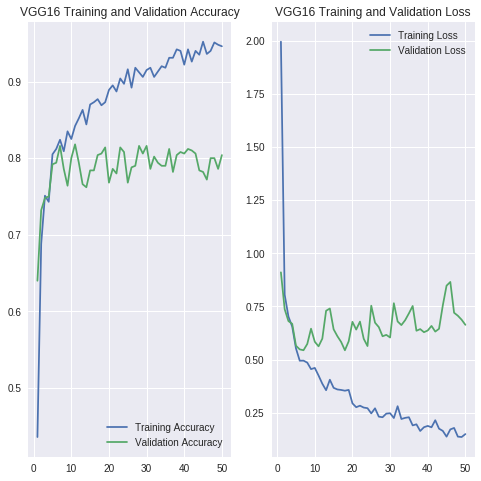

In [29]:
 plt_acc(history, pfx = 'VGG16')

In [30]:
conv_base = applications.ResNet50(weights='imagenet',include_top=False, 
                                  input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/50
32/32 [==============================] - 15s 470ms/step - loss: 10.1040 - acc: 0.3400 - val_loss: 12.7841 - val_acc: 0.2000
Epoch 2/50
32/32 [==============================] - 12s 381ms/step - loss: 10.2955 - acc: 0.3600 - val_loss: 12.8378 - val_acc: 0.2000
Epoch 3/50
32/32 [==============================] - 12s 382ms/step - loss: 9.3634 - acc: 0.4130 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/50
32/32 [==============================] - 12s 388ms/step - loss: 8.8310 - acc: 0.4390 - val_loss: 10.6341 - val_acc: 0.1840
Epoch 5/50
32/32 [==============================] - 12s 390ms/step - loss: 9.8370 - acc: 0.3830 - val_loss: 12.1474 - val_acc: 0.2160
Epoch 6/50
32/32 [==============================] - 12s 386ms/step - loss: 8.6660 - acc: 0.4580 - val_loss: 12.8509 - val_acc: 0.2000
Epoch 7/50
32/32 [==============================] - 13s 395ms/step - loss: 7.8612 - acc: 0.5020 - val_loss: 12.4649 - val_acc: 0.2100
Epoch 8/50
32/32 [==============================] - 12s 385m

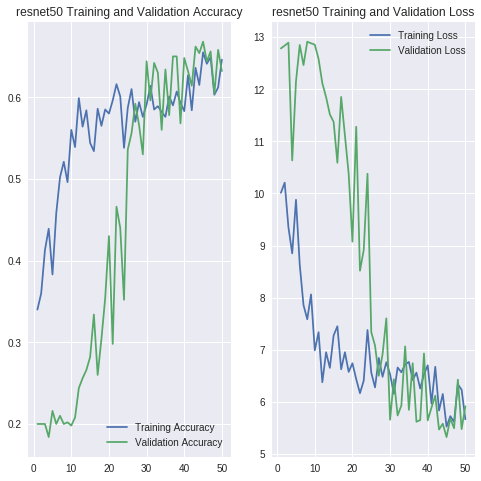

In [31]:
 plt_acc(history, pfx = 'resnet50')

In [0]:
conv_base = applications.InceptionV3(weights='imagenet',include_top=False, 
                                     input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

Epoch 1/50
32/32 [==============================] - 15s 482ms/step - loss: 11.0288 - acc: 0.2170 - val_loss: 9.5650 - val_acc: 0.3220
Epoch 2/50
32/32 [==============================] - 12s 361ms/step - loss: 7.3452 - acc: 0.4130 - val_loss: 7.0236 - val_acc: 0.4880
Epoch 3/50
32/32 [==============================] - 12s 378ms/step - loss: 5.3563 - acc: 0.4570 - val_loss: 2.7964 - val_acc: 0.5800
Epoch 4/50
32/32 [==============================] - 12s 378ms/step - loss: 1.5076 - acc: 0.5650 - val_loss: 0.9761 - val_acc: 0.7080
Epoch 5/50
32/32 [==============================] - 12s 375ms/step - loss: 0.8988 - acc: 0.6890 - val_loss: 0.8587 - val_acc: 0.7040
Epoch 6/50
32/32 [==============================] - 12s 379ms/step - loss: 0.7810 - acc: 0.7060 - val_loss: 0.8048 - val_acc: 0.7360
Epoch 7/50
32/32 [==============================] - 12s 374ms/step - loss: 0.8002 - acc: 0.7290 - val_loss: 0.9246 - val_acc: 0.6980
Epoch 8/50
32/32 [==============================] - 12s 380ms/step -

In [0]:
 plt_acc(history, pfx = 'InceptionV3')

Difference between RestNet50 and InceptionV3

**RestNet50**
*   List item
*   List item

**InceptionV3**
* Item
* Item


# Part 2 
1. Collect a dataset of at least three landmarks. Your dataset should include at least 100 images of each in train, 50 in validation, and 25 in test (using more images is fine). You can randomly shuffle your dataset to create these splits.

2. Write a model to classify your dataset using transfer learning. Run an experiment and report your results. What do you find?
   
3. Next, how small of a model (in terms of the number of parameters) can you write to classify these images reasonably well? Explore the available